# Trabalho avaliativo - Sistemas de controle II - 2023.2

**Leia com atenção as instruções abaixo**

*Informe na célula de código abaixo o seu número de matrícula:* 

***Não remova as aspas***

In [1]:
# Informe aqui sua matrícula
mat = '201733940015'

*Depois de informar os dados, execute o arquivo inteiro. Caso ocorra algum erro, peça ajuda ao professor*

*Resolva as questões abaixo, **justificando** todas as respostas. Utilize markdown para escrever texto e Python para fazer as contas. O trabalho é individual*

In [2]:
# 
# Não modifique esta célula! Você pode comprometer a sua avaliação.
from numpy.random import RandomState
from IPython.display import display, Math
from sympy import symbols, sin, cos, latex
from sympy import ImmutableMatrix as matriz
from numpy import arange
import numpy as np

_nn = int(mat[0:4]+mat[-2:])
_rng = RandomState(_nn)
#_dig = arange(-9,10)
#_dig = _dig[_dig!=0]
#_n = _rng.randint(0,_dig.size,20)
_n = _rng.random(size=(4,)).round(3)
def G(): 
    s = symbols('s')
    c = .5+0.10*_n[0]
    d = .5+0.25*_n[1]
    a = .2+0.15*_n[2]
    b = 9+_n[3]
    b0 = (b*c**2*d).round(3)
    b1 = (a*b*c**2*d).round(3)
    G = (b1*s+b0)/((s+c)**2*(s+d))
    display(Math('G(s) = ' + latex(G)))

## 1.

*Considere o sistema:*

In [3]:
G()

<IPython.core.display.Math object>

1. *Faça uma análise de malha aberta: verifique estabilidade e características de resposta ao degrau unitário (25%). Opcional: analise o que aconteceria caso fosse utilizada realimentação proporcional (+10% extra)*

2. *Proponha especificações de desempenho em malha fechada com base na análise de malha aberta do item 1 (20%).*

3. *Projete um compensador de estados de ordem completa, de acordo com as especificações estabelecidas no item 2 e também forneça rejeição à distúrbios do tipo degrau. Justifique as escolhas de todos os pólos e apresente as funções de transferência do compensador ao final (35%).*

4. *Analise e simule o sistema em malha fechada. Plote e analise os sinais de saída e de controle (20%). Opcional: faça uma análise de resposta a uma perturbação (+10% extra)*

---

# RESPOSTAS

1. *Faça uma análise de malha aberta: verifique estabilidade e características de resposta ao degrau unitário (25%). Opcional: analise o que aconteceria caso fosse utilizada realimentação proporcional (+10% extra)*

Para realizar a análise, será usada a biblioteca **Python-Control**, para isso, é preciso ter a função de transferência expandida tanto no denominador quanto no numerador, assim, será realizada a expanssão do denominador usando a biblioteca **sympy**.

In [4]:
s = symbols('s')

den = (s + 0.5678)**2 * (s + 0.6195)
den.as_poly()

Poly(1.0*s**3 + 1.7551*s**2 + 1.02590104*s + 0.19972484238, s, domain='RR')

Importando a biblioteca control para realizar as análises em malha aberta do sistema.

In [5]:
import control as ct
import matplotlib.pyplot as plt

Com o numerador e denominador expandidos, é possível obter a função de transferência com a biblioteca control, assim temos:

In [6]:
num = np.array([0.5080, 1.996])
den = np.array([1.0, 1.7551, 1.0259, 0.1997])

Gs = ct.TransferFunction(num, den)
Gs

TransferFunction(array([0.508, 1.996]), array([1.    , 1.7551, 1.0259, 0.1997]))

In [7]:
ct.damp(Gs);

_____Eigenvalue______ Damping___ Frequency_
   -0.6029 +0.008373j     0.9999      0.603
   -0.6029 -0.008373j     0.9999      0.603
   -0.5492                     1     0.5492


#### Análise da Estabiblidade

In [8]:
print("\nPolos: ", ct.poles(Gs))
print("\nZeros: ", ct.zeros(Gs))


Polos:  [-0.60294159+0.00837337j -0.60294159-0.00837337j -0.54921683+0.j        ]

Zeros:  [-3.92913386+0.j]


O sistema é estável já que seus pólos de malha aberta estão no seme-plano esquerdo do plano complexo.

#### Análise da resposta ao degrau

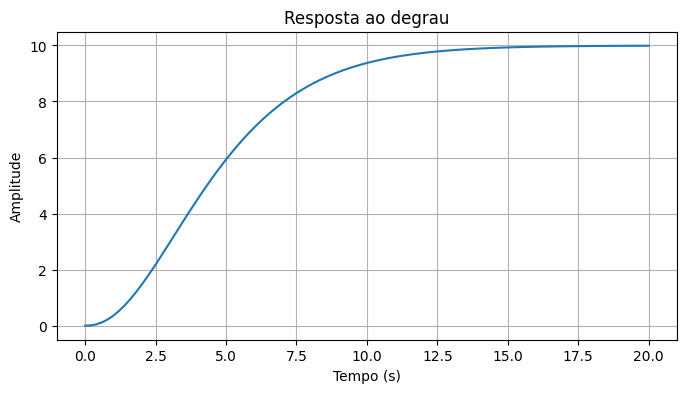

In [9]:
t, y = ct.step_response(Gs, T=20)

plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.title("Resposta ao degrau")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


In [10]:
ct.step_info(Gs)

{'RiseTime': 7.241570623420809,
 'SettlingTime': nan,
 'SettlingMin': 9.012838765840575,
 'SettlingMax': 9.9949924887331,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 9.791912022012033,
 'PeakTime': 12.577464766994037,
 'SteadyStateValue': 9.9949924887331}

Ao realizar a resposta ao degrau unitário, pode-se observar o comportamento do sistema, a função **ct.step_info()** mostrar os valores dos parâmetros do sistema, entre eles tem-se:

> Tempo de subida: 7.241s\
> Tempo de acomodação:  12,57\
> Overshoot : 0%
> Valor de estado estacionário: 9,994



#### Aplicando uma Realimentação Proporcional no Sistema


Polos de Malha Fechada:  [-2.21736275+0.j          0.23113138+2.13013673j  0.23113138-2.13013673j]


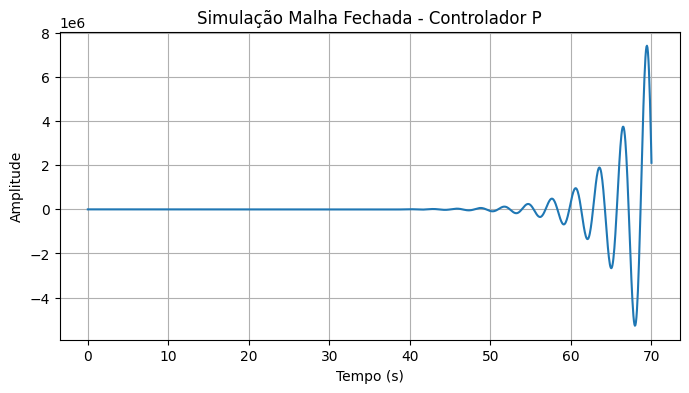

In [11]:
Cs = 5.0

H_mf = ct.feedback(Cs*Gs, 1, -1)
print("\nPolos de Malha Fechada: ", ct.poles(H_mf))

t1, y1 = ct.step_response(H_mf, T=70)

plt.figure(figsize=(8, 4))
plt.plot(t1, y1)
plt.title("Simulação Malha Fechada - Controlador P")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


In [12]:
ct.step_info(H_mf)

{'RiseTime': 0.49811175087375553,
 'SettlingTime': nan,
 'SettlingMin': -745.2923725631846,
 'SettlingMax': 532.5150631505201,
 'Overshoot': 54217.07002358066,
 'Undershoot': 76020.56878738929,
 'Peak': 745.2923725631846,
 'PeakTime': 29.637649176988454,
 'SteadyStateValue': 0.9803825260076426}

Ao aplicar um controlador proporcional na planta, ocorreu que o sistema se tornou instável, isso é possível de se observar o gráfico do sinal de saída ao os pólos de malha fechada do sistema, podemos observar que existe dois pólos no semi-plano direto, eles são os responsáveis pela instabilidade, além disso, ao observar os dados obtidos usando a função **tc.step_info()**, se conclui que os requisitos do sistema pioram, já que o sistema se tornou instável.

---

2. *Proponha especificações de desempenho em malha fechada com base na análise de malha aberta do item 1 (20%).*

Para o projeto será considerado as seguintes speficifações:

- Sobrecinal $\le 8\%$
- Frequência natural: $w_n$ três vezes o valor do polo em malha aberta

$$
\begin{align}
    \xi &= \frac{-\ln{(\%UP/100)}}{\sqrt{\pi^2+\ln^2{(\%UP/100)}}}\\
\end{align}
$$

In [13]:
from IPython.display import display, Latex

wn = 3*0.603
Up = 8

xi = (-np.log(Up/100))/(np.sqrt(np.pi**2+np.log(Up/100)**2))
display(Latex(f"$\\xi = {xi}$"))

# Pólos dominantes a partir dos requisitos desejados
p = -xi*wn+1j*wn*np.sqrt(1-xi**2)
display(Latex(f"$p_{{1,2}} = {np.real(p):.4f}\pm {np.imag(p):.4f}j$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Temos conhecimento de que o sistema é de terceira ordem. Ao introduzirmos o integrador, ele passará a ser de quarta ordem (antes do observador). Portanto, além dos polos dominantes, devemos alocar mais dois polos. Optaremos por colocar um polo acima do zero, para cancelar, e outro polo real arbitrário, cuja parte real será quatro vezes maior que a parte real do polo dominante.

In [14]:
polos_desejados = [p,np.conjugate(p),ct.zeros(Gs)[0],4*np.real(p)]
print(polos_desejados)
poli_mf = np.poly(polos_desejados)
print(poli_mf)

[(-1.13347813102236+1.4098611018444538j), (-1.13347813102236-1.4098611018444538j), (-3.9291338582677167+0j), -4.53391252408944]
[ 1.         10.73000264 40.2721862  68.07950898 58.29711931]


Então o polinômio desejado é:
$$
\begin{align}
    \alpha(s) &=s^4 + 10.730s^3 + 40.27s^2 + 68.079s + 58.29
\end{align}
$$

Vamos agora definir o sistema no espaço de estados usando FCC

In [15]:
F = np.block([[-den[1:]],[np.eye(2), np.zeros((2,1))]])
G = np.block([[1],[np.zeros((2,1))]])
H = np.block([[0,num]])
J = 0
n = F.shape[0]

F

array([[-1.7551, -1.0259, -0.1997],
       [ 1.    ,  0.    ,  0.    ],
       [ 0.    ,  1.    ,  0.    ]])

A partir das matrizes acima, podemos aumentar as matrizes para o projeto com integrador:

In [16]:
Fa = np.block([ [   F,   np.zeros((n,1)) ],
                [  -H,   0          ]])

Ga = np.block([[G], [0]])

print(Fa)
print("")
print(Ga)

[[-1.7551 -1.0259 -0.1997  0.    ]
 [ 1.      0.      0.      0.    ]
 [ 0.      1.      0.      0.    ]
 [-0.     -0.508  -1.996   0.    ]]

[[1.]
 [0.]
 [0.]
 [0.]]



Alocação de polos com integrador

In [17]:
Ka = ct.acker(Fa,Ga,polos_desejados)
K = Ka[:,0:n]
Ki = Ka[:,-1]
print(Ka)
print("")
print(K)
print("")
print(Ki)

[[  8.97490264  39.2462862   53.04266639 -29.2069736 ]]

[[ 8.97490264 39.2462862  53.04266639]]

[-29.2069736]


Será usado Polos do observador reais e iguais, a um fator de 4 da parte real dos pólos dominantes:

In [18]:
po = 4*np.real(p)
#print(po)
L = ct.acker(F.T, H.T, [po]*n).T      # [po]*n = repete a lista n vezes, ou seja [po,po,po]
print("Ganhos do observador. L = ")
print(L)

Ganhos do observador. L = 
[[17.38886945]
 [15.53988429]
 [ 1.98014847]]


#### Equações do controlador

In [19]:
Fc = np.block([[F-G@K-L@H, np.zeros((n,1))],[np.zeros((1,n+1))]])
Gc = np.block([[L, np.zeros((n,1))],[np.array([-1,1])]])
Hc = -Ka
cont = ct.ss(Fc,Gc,Hc,0)
print(cont)

<LinearIOSystem>: sys[23]
Inputs (2): ['u[0]', 'u[1]']
Outputs (1): ['y[0]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[-1.07300026e+01 -4.91057319e+01 -8.79505498e+01  0.00000000e+00]
     [ 1.00000000e+00 -7.89426122e+00 -3.10176090e+01  0.00000000e+00]
     [ 0.00000000e+00 -5.91542423e-03 -3.95237635e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

B = [[17.38886945  0.        ]
     [15.53988429  0.        ]
     [ 1.98014847  0.        ]
     [-1.          1.        ]]

C = [[ -8.97490264 -39.2462862  -53.04266639  29.2069736 ]]

D = [[0. 0.]]



#### Funções de transferência para o controlador

In [20]:
(ct.tf(cont))

TransferFunction([[array([  -900.18548529,  -3274.23808355,  -8486.21050981, -15374.05718181]), array([   29.2069736 ,   659.39533487,  6052.78876167, 15374.05718181])]], [[array([ 1.00000000e+00,  2.25766402e+01,  2.07237793e+02,  5.26383096e+02,
       -1.81898940e-12]), array([ 1.00000000e+00,  2.25766402e+01,  2.07237793e+02,  5.26383096e+02,
       -1.81898940e-12])]])


#### Simulação do sisnal de saída e de controle

In [21]:
Fmf = np.block([[F,-G@K,-G*Ki],[L@H,F-G@K-L@H,-G*Ki],[-H,np.zeros((1,n+1))]])
Gmf = np.block([[np.zeros((2*n,1))],[1]])
Hmf_y = np.block([[H,np.zeros((1,n+1))]])
Hmf_u = np.block([[-Ka,np.zeros((1,n))]])
Jmf = 0
MF_y = ct.ss(Fmf,Gmf,Hmf_y,Jmf)
MF_u = ct.ss(Fmf,Gmf,Hmf_u,Jmf)
#print(MF)
T=(ct.damp(MF_y))
print("")
print(ct.zeros(MF_y))

_____Eigenvalue______ Damping___ Frequency_
    -1.133     +1.41j     0.6266      1.809
    -1.133     -1.41j     0.6266      1.809
    -4.535 +0.001199j          1      4.535
    -4.535 -0.001199j          1      4.535
    -4.533   +0.0012j          1      4.533
    -4.533   -0.0012j          1      4.533
    -3.929                     1      3.929

[-4.53396729+0.00000000e+00j -4.53388514+4.74298586e-05j
 -4.53388514-4.74298586e-05j -3.92913386+0.00000000e+00j]


In [22]:
ct.step_info(MF_y)

{'RiseTime': 1.1521561363590649,
 'SettlingTime': 3.5474281040529103,
 'SettlingMin': 0.9060863789604487,
 'SettlingMax': 1.0718242090866557,
 'Overshoot': 7.1824209086655415,
 'Undershoot': 0,
 'Peak': 1.0718242090866557,
 'PeakTime': 2.5165515609947997,
 'SteadyStateValue': 1.0000000000000002}

In [23]:
ts = 4/abs(np.real(p))
t,y = ct.step_response(MF_y,3*ts)
t,u = ct.step_response(MF_u,3*ts)


#### Gráfico do sinal de saída

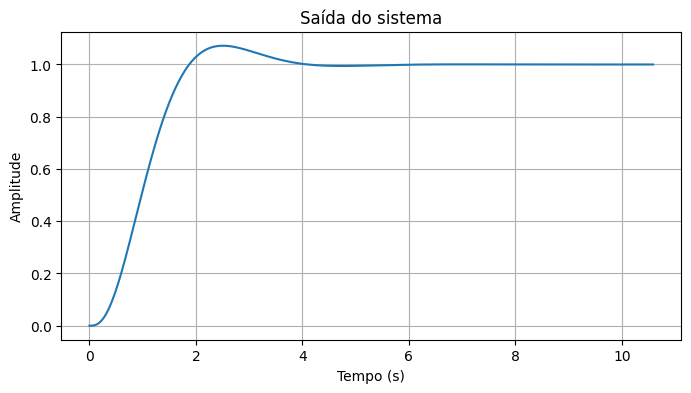

In [24]:
plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.title("Saída do sistema")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
np.max(y)
plt.show()

#### Gráfico do sisnal de Controle

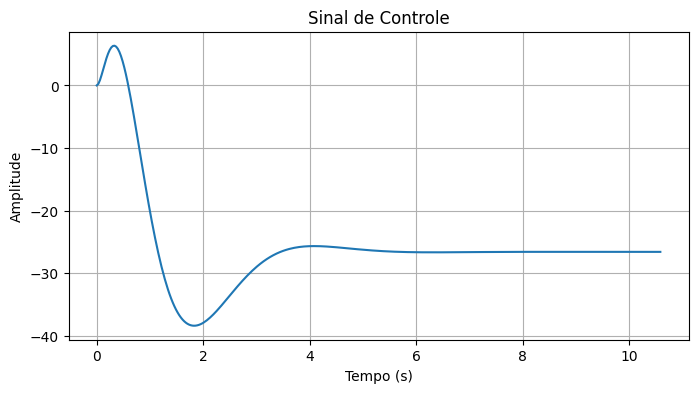

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(t,u)
plt.title("Sinal de Controle")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
np.max(y)
plt.show()